In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr
import rasterio as rio
import rioxarray as rxa
import shapely

import matplotlib.pyplot as plt
import seaborn as sns

from stats import two_arr_clean, clean_xs_ys

from uavsar_pytools.snow_depth_inversion import phase_from_depth

/bsuhome/zacharykeskinen/scratch/data/uavsar/images/Utica, MT
/bsuhome/zacharykeskinen/scratch/data/uavsar/images/Eldorado National Forest, CA
/bsuhome/zacharykeskinen/scratch/data/uavsar/images/Rocky Mountains NP, CO
/bsuhome/zacharykeskinen/scratch/data/uavsar/images/Grand Mesa, CO
/bsuhome/zacharykeskinen/scratch/data/uavsar/images/Grand Mesa, CO/grmesa_27416_20003-028_20008-004_0018d_s01_L090_01_int_grd
/bsuhome/zacharykeskinen/scratch/data/uavsar/images/Grand Mesa, CO/grmesa_27416_20003-028_20017-006_0040d_s01_L090_01_int_grd
/bsuhome/zacharykeskinen/scratch/data/uavsar/images/Grand Mesa, CO/grmesa_27416_20003-028_20013-004_0025d_s01_L090_01_int_grd
/bsuhome/zacharykeskinen/scratch/data/uavsar/images/Sierra National Forest, CA
/bsuhome/zacharykeskinen/scratch/data/uavsar/images/Fraser, CO
/bsuhome/zacharykeskinen/scratch/data/uavsar/images/Peeler Peak, CO
/bsuhome/zacharykeskinen/scratch/data/uavsar/images/Silver City, ID
/bsuhome/zacharykeskinen/scratch/data/uavsar/images/Ironton

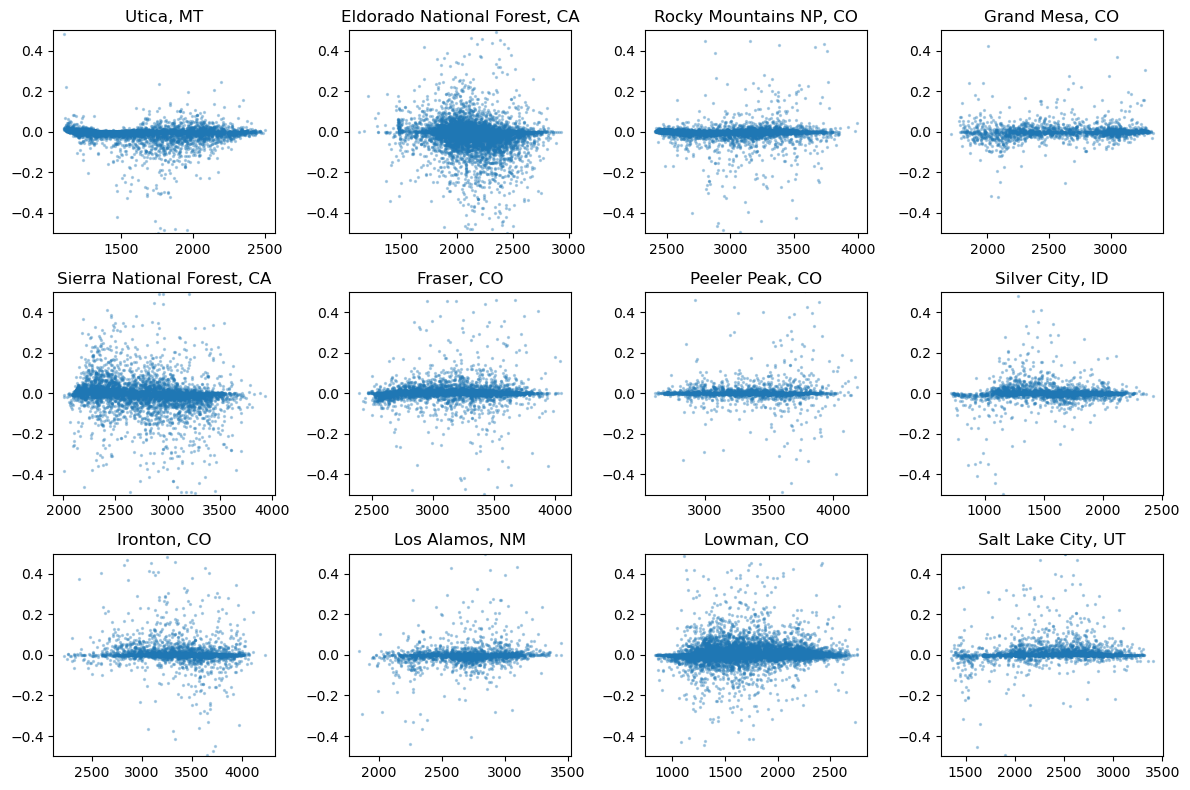

In [43]:
fig, axes = plt.subplots(3, 4, figsize = (12, 8))
ncs = Path('/bsuhome/zacharykeskinen/scratch/data/uavsar/images/')
i = 0
n = 100
for loc in ncs.glob('*'):
    if loc.stem.__contains__('Donner'):
        continue
    print(loc)
    loc_xs, loc_ys = np.array([]), np.array([])

    for j, d in enumerate(loc.glob('*')):
        if d.stem == 'tmp':
            continue
        if len(list(d.glob('*VV*int.grd.tiff'))) == 0 or len(list(d.glob('*VV*hgt.grd.tiff'))) == 0:
            print(d)
            continue
        dem = xr.open_dataarray(next(d.glob('*VV*hgt.grd.tiff')))
        phase = xr.open_dataarray(next(d.glob('*VV*int.grd.tiff')))
        xs, ys = clean_xs_ys(dem[0, ::n, ::n].data.ravel(), phase[0, ::n, ::n].data.ravel())
        loc_xs, loc_ys = np.concatenate([loc_xs, xs], axis = 0), np.concatenate([loc_xs, ys], axis = 0)

    if i < 12:
        ax = axes.ravel()[i]
        ax.scatter(xs, ys, marker = 'o', s = 2, alpha = 0.3)
        axes.ravel()[i].set_ylim(-0.5, 0.5)
        # axes.ravel()[i].set_yticks([])
        ax.set_title(loc.stem)
        
        i += 1
plt.tight_layout()


In [2]:
fig, axes = plt.subplots(3, 4, figsize = (12, 8))
ncs = Path('/bsuhome/zacharykeskinen/scratch/data/uavsar/images/')
i = 0
n = 100
for loc in ncs.glob('*'):
    if loc.stem.__contains__('Donner'):
        continue
    print(loc)
    loc_xs, loc_ys = np.array([]), np.array([])

    for j, d in enumerate(loc.glob('*')):
        if d.stem == 'tmp':
            continue
        if len(list(d.glob('*VV*unw.grd.tiff'))) == 0 or len(list(d.glob('*VV*hgt.grd.tiff'))) == 0:
            continue
        ann = pd.read_csv(next(d.glob('*csv')))
        dem = xr.open_dataarray(next(d.glob('*VV*hgt.grd.tiff')))
        phase = xr.open_dataarray(next(d.glob('*VV*unw.grd.tiff')))
        xs, ys = clean_xs_ys(dem[0, ::n, ::n].data.ravel(), phase[0, ::n, ::n].data.ravel())
        loc_xs, loc_ys = np.concatenate([loc_xs, xs], axis = 0), np.concatenate([loc_xs, ys], axis = 0)

    if i < 12:
        ax = axes.ravel()[i]
        ax.scatter(xs, ys, marker = 'o', s = 2, alpha = 0.3)
        # axes.ravel()[i].set_ylim(-0.5, 0.5)
        # axes.ravel()[i].set_yticks([])
        ax.set_title(loc.stem)
        
        i += 1
plt.tight_layout()


/bsuhome/zacharykeskinen/scratch/data/uavsar/images/Utica, MT


nan
True
Phase v3
False
nan
True
nan
True
nan
True
nan
True
Phase v3
False
Phase v3
False
Phase v3
False
Phase v3
False
Phase v3
False
nan
True
Phase v3
False
Phase v3
False
Phase v3
False
Phase v3
False
Phase v3
False


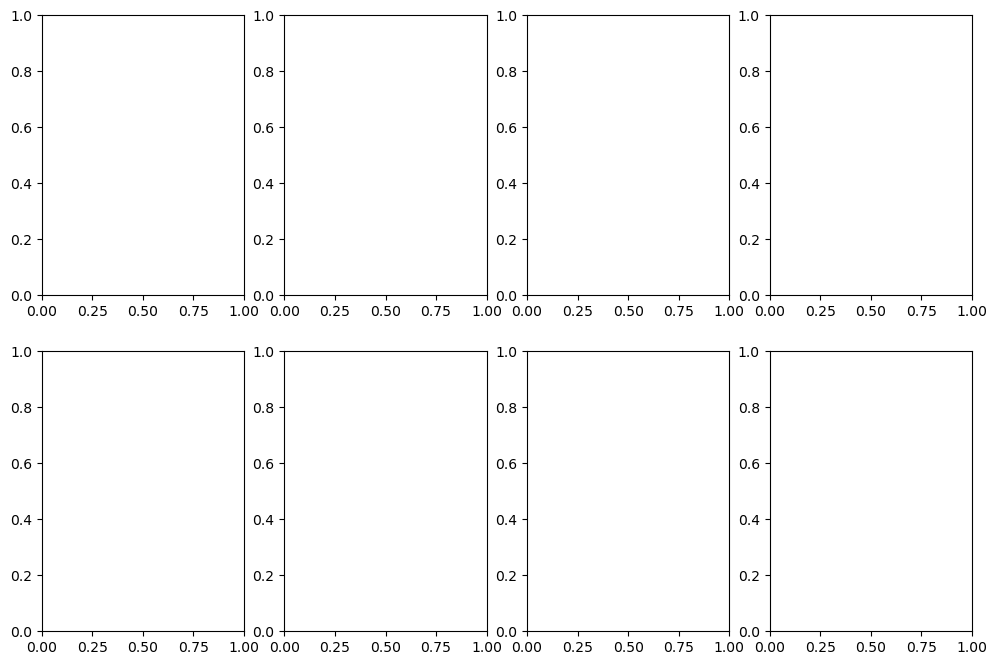

In [32]:
fig, axes = plt.subplots(2, 4, figsize = (12, 8))

ncs = Path('/bsuhome/zacharykeskinen/scratch/data/uavsar/ncs/old/')
j, k = 0, 0
for i, dir in enumerate(ncs.joinpath('images').glob('*')):
    # print(i)
    if dir.stem == 'tmp':
        continue
    ann = pd.read_csv(next(dir.glob('*csv')), index_col=0)
    rbem = ann.loc['value', 'residual baseline estimation method']
    # int = xr.open_dataarray(next(dir.glob('*VV*int*.tiff')))
    # int = xr.apply_ufunc(np.angle, int)
    # int = int.data.ravel()
    # dem = xr.open_dataarray(next(dir.glob('*VV*hgt*.tiff'))).data.ravel()
    # int, dem = two_arr_clean(int, dem)
    # n = 1000
    # int, dem = int[::n], dem[::n]
    print(rbem)
    print(pd.isna(rbem))
    # if rbem == 'Phase v3':
    #     axes[1, k].scatter(dem,int, s = 1, alpha = 0.1)
    #     k += 1
    # elif np.isnan(float(rbem))
    #     axes[0, j].scatter(dem,int, s = 1, alpha = 0.1)
    #     j +=1
    # else:
    #     print(rbem)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


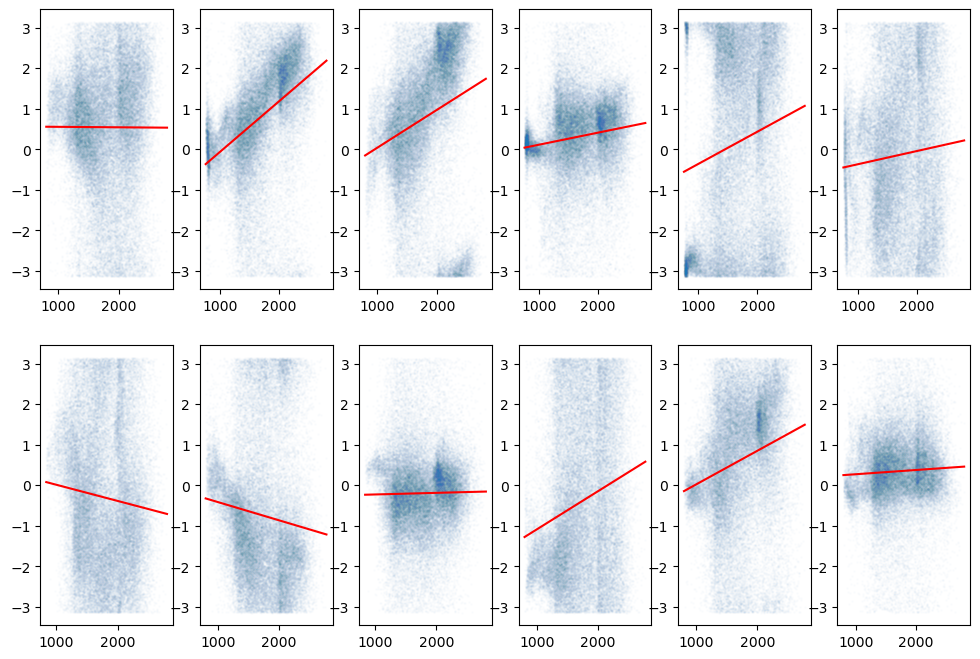

In [45]:
from sklearn.linear_model import LinearRegression
fig, axes = plt.subplots(2, 6, figsize = (12, 8))

ncs = Path('/bsuhome/zacharykeskinen/scratch/data/uavsar/ncs/old/')
j, k = 0, 0
for i, dir in enumerate(ncs.joinpath('images').glob('*')):
    print(i)
    if dir.stem == 'tmp':
        continue
    ann = pd.read_csv(next(dir.glob('*csv')), index_col=0)
    rbem = ann.loc['value', 'residual baseline estimation method']
    int = xr.open_dataarray(next(dir.glob('*VV*int*.tiff')))
    int = xr.apply_ufunc(np.angle, int)
    int = int.data.ravel()
    dem = xr.open_dataarray(next(dir.glob('*VV*hgt*.tiff'))).data.ravel()
    int, dem = two_arr_clean(int, dem)
    n = 2000
    int, dem = int[::n], dem[::n]
    lm = LinearRegression().fit(dem.reshape(-1, 1), int.reshape(-1, 1))
    x_lm = np.arange(dem.min(), dem.max())
    y_lm = lm.predict(x_lm.reshape(-1, 1))

    if (rbem == 'Phase v3' or rbem == 'Phase v3 ' or isinstance(rbem, str)):
        if k < 6:
            axes[1, k].scatter(dem,int, s = 1, alpha = 0.01)
            axes[1, k].plot(x_lm, y_lm, color = 'red')
            k += 1
    elif pd.isna(rbem):
        if j < 6:
            axes[0, j].scatter(dem,int, s = 1, alpha = 0.01)
            axes[0, j].plot(x_lm, y_lm, color = 'red')
            j += 1
    else:
        print(rbem)
    # plt.show()

In [35]:
da = rxa.open_rasterio(next(d.glob('*VV*int.grd.tiff')))

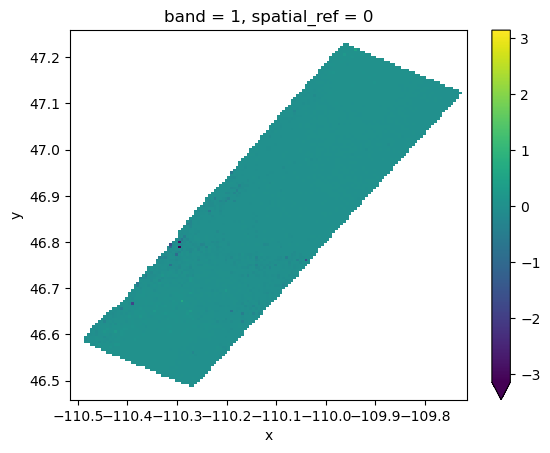

In [38]:
da[0, ::100, ::100].plot(vmax = np.pi, vmin = -np.pi)

In [27]:
with rio.open(next(d.glob('*VV*int.grd.tiff'))) as src:
    arr = src.read(1, dtype = 'complex64')

TypeError: read() got an unexpected keyword argument 'dtype'

/bsuhome/zacharykeskinen/scratch/data/uavsar/images/Utica, MT/uticam_21003_21004-002_21013-003_0034d_s01_L090_01_int_grd
/bsuhome/zacharykeskinen/scratch/data/uavsar/images/Utica, MT/uticam_21003_21002-003_21004-002_0005d_s01_L090_01_int_grd


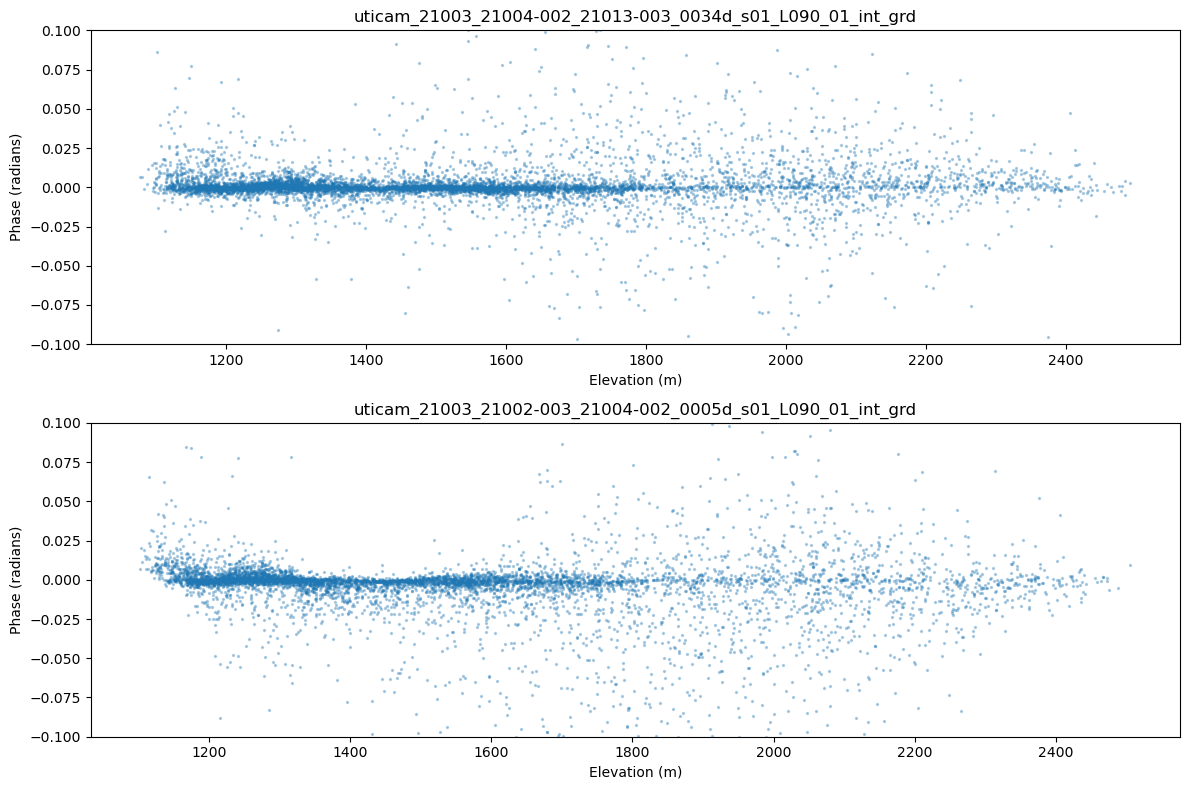

In [3]:
ncs = Path('/bsuhome/zacharykeskinen/scratch/data/uavsar/images/')
i = 0
n = 100
for loc in ncs.glob('*'):
    if not loc.stem.__contains__('Utica'):
        continue
    fig, axes = plt.subplots(len(list(loc.glob('*grd*'))), figsize = (12, 8))
    for j, d in enumerate(loc.glob('*grd*')):
        print(d)
        if d.stem == 'tmp':
            continue
        if len(list(d.glob('*VV*int.grd.tiff'))) == 0 or len(list(d.glob('*VV*hgt.grd.tiff'))) == 0:
            print(d)
            continue
        dem = xr.open_dataarray(next(d.glob('*VV*hgt.grd.tiff')))
        phase = xr.open_dataarray(next(d.glob('*VV*int.grd.tiff')))
        xs, ys = clean_xs_ys(dem[0, ::n, ::n].data.ravel(), phase[0, ::n, ::n].data.ravel())
        ax = axes.ravel()[j]
        ax.scatter(xs, ys, marker = 'o', s = 2, alpha = 0.3)
        ax.set_title(d.stem)
        ax.set_ylim(-0.1, 0.1)
        ax.set_xlabel('Elevation (m)')
        ax.set_ylabel('Phase (radians)')
plt.tight_layout()


In [12]:
image_dir = Path('/bsuhome/zacharykeskinen/scratch/data/uavsar/images/Utica, MT/uticam_21003_21002-003_21004-002_0005d_s01_L090_01_int_grd')
dem = xr.open_dataarray(next(image_dir.glob('*hgt*.tiff')))
int = xr.open_dataarray(next(image_dir.glob('*int*.tiff')))

In [13]:
np.rad2deg(int.quantile([0.05, 0.95]))

<xarray.DataArray 'band_data' (quantile: 2)>
array([-5.30505418,  1.49598208])
Coordinates:
  * quantile  (quantile) float64 0.05 0.95

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (12, 8))
ncs = Path('/bsuhome/zacharykeskinen/scratch/data/uavsar/images/Lowman, CO')
i = 0
for j, d in enumerate(ncs.glob('*')):
    # for fp in d.glob('*.csv'):
    #     ann = pd.read_csv(fp, index_col = 0)
    #     t1 = pd.to_datetime(ann.loc['value', 'start time of acquisition for pass 1'])
    #     t2 = pd.to_datetime(ann.loc['value', 'start time of acquisition for pass 2'])
    #     if t1.strftime('%Y%m%d') == '20210203' and t2.strftime('%Y%m%d') == '20210210' and '232' in fp.stem:
    #         pass
    if len(list(d.glob('*232*VV*unw.grd.tiff'))) == 1:
        # print(fp)
        for fp in d.glob('*hgt.grd.tiff'):
            dem = xr.open_dataarray(fp)
        for fp in d.glob('*unw.grd.tiff'):
            phase = xr.open_dataarray(fp)
        xs, ys = clean_xs_ys(dem[0, ::100, ::100].data.ravel(), phase[0, ::100, ::100].data.ravel())
        axes.ravel()[i].scatter(xs, ys, marker = 'o', s = 2, alpha = 0.3)
        axes.ravel()[i].set_ylim(-5, 5)
        if i != 0 and i != 3 and i != 6:
            axes.ravel()[i].set_yticks([])
        i += 1


In [157]:
df = pd.read_parquet('/bsuhome/zacharykeskinen/uavsar-validation/data/insitu/storm_boards.parq')

In [158]:
import requests
import urllib
import pandas as pd

def elevation_function(df, lat_column, lon_column):
    """Query service using lat, lon. add the elevation values as a new column."""
    elevations = []
    for lat, lon in zip(df[lat_column], df[lon_column]):
                
        # define rest query params
        params = {
            'output': 'json',
            'x': lon,
            'y': lat,
            'units': 'Meters'
        }
        
        url = r'https://epqs.nationalmap.gov/v1/json?'

        # format query string and return query value
        result = requests.get((url + urllib.parse.urlencode(params)))
        #elevations.append(result.json()['USGS_Elevation_Point_Query_Service']['Elevation_Query']['Elevation'])
        #new 2023:
        elevations.append(result.json()['value'])

    df['elev_meters'] = elevations

elevation_function(df, 'latitude', 'longitude')
df['elev_meters'] = df.elev_meters.astype(float)

/tmp/ipykernel_19663/2253086586.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['hn_cm'] = sub['hn'] * 100
/tmp/ipykernel_19663/2253086586.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['phase'] = phase_from_depth(sub['hn'], inc_angle = np.deg2rad(40), density = sub.den.mean())
/tmp/ipykernel_19663/2253086586.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

No permittivity data provided -- calculating permittivity from snow density using method guneriussen2001.
No permittivity data provided -- calculating permittivity from snow density using method guneriussen2001.


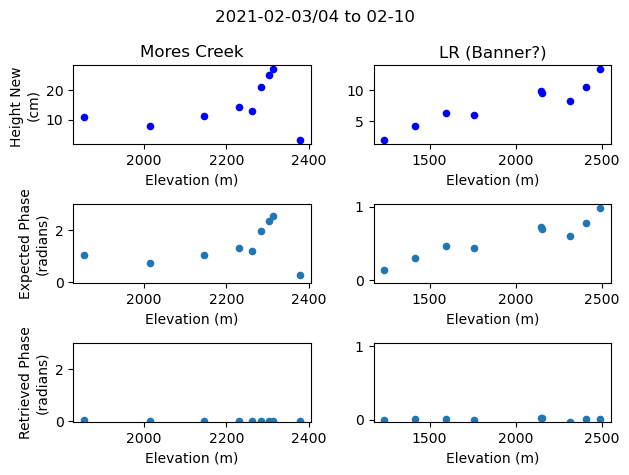

In [213]:
uavsar = xr.open_dataarray(next(Path('/bsuhome/zacharykeskinen/scratch/data/uavsar/images/Lowman, CO/lowman_23205_21009-004_21012-000_0007d_s01_L090_01_int_grd/').glob('*int.grd.tiff')))

fig, axes = plt.subplots(3, 2)
for j, site_name in enumerate(['MC', 'LR']):

    fig.suptitle('2021-02-03/04 to 02-10')
    sub = df[(df.date_t2 == '2021-02-10') & (df.site.str.contains(site_name))]
    sub['hn_cm'] = sub['hn'] * 100
    sub.plot.scatter(x = 'elev_meters', y = 'hn_cm', ax = axes[0, j], color = 'blue')
    # axes[0, j].set_ylim(-.03, 15)

    sub['phase'] = phase_from_depth(sub['hn'], inc_angle = np.deg2rad(40), density = sub.den.mean())
    # ax2 = ax.twinx()
    sub.plot.scatter(x = 'elev_meters', y = 'phase', ax = axes[1, j])
    # axes[1, j].set_ylim(-.03, 1.01)

    retrieved_int = []
    # tolerance around each site 100 m\n",
    tol = 0.00090009
    for i, r in sub.iterrows():
        int = uavsar.sel(x = r.longitude, y = r.latitude, method = 'nearest')
        # int = uavsar.sel(x = slice(r.longitude - tol, r.longitude + tol), y = slice(r.latitude + tol, r.latitude - tol)).mean()
        retrieved_int.append(int.data.ravel()[0])
    sub['int'] = np.array(retrieved_int)

    sub.plot.scatter(x = 'elev_meters', y = 'int', ax = axes[2, j])
    if j == 0:
        axes[0, j].set_ylabel('Height New \n(cm)')
        axes[1, j].set_ylabel('Expected Phase\n(radians)')
        axes[2, j].set_ylabel('Retrieved Phase\n(radians)')
    else:
        for k in range(3):
            axes[k, j].set_ylabel('')
    # axes[2, j].set_ylim(-.03, 1.01)

for ax in axes.ravel():
    ax.set_xlabel('Elevation (m)')
for ax in axes[1:, 0]:
    ax.set_ylim(-0.03, 3)
for ax in axes[1:, 1]:
    ax.set_ylim(-0.03, 1.03)
axes[0,0].set_title('Mores Creek')
axes[0,1].set_title('LR (Banner?)')

plt.tight_layout()
plt.show()